## Association/Dissociation reaction `2A <-> C`
#### with 2nd-order kinetics for `A`,  
#### and 1-st order kinetics for `C`

Taken to equilibrium.  (Adaptive variable time substeps are used)

_See also the experiment "1D/reactions/reaction_7"_ 

LAST REVISED: Mar. 7, 2023

In [1]:
# Extend the sys.path variable, to contain the project's root directory
import set_path
set_path.add_ancestor_dir_to_syspath(2)  # The number of levels to go up 
                                         # to reach the project's home, from the folder containing this notebook

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from src.modules.reactions.reaction_data import ReactionData as chem
from src.modules.reactions.reaction_dynamics import ReactionDynamics

import numpy as np
import plotly.express as px
from src.modules.visualization.graphic_log import GraphicLog

In [3]:
# Initialize the HTML logging (for the graphics)
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_1"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'react_4.log.htm'


# Initialize the System
Specify the chemicals and the reactions

In [4]:
# Specify the chemicals
chem_data = chem(names=["A", "C"])

# Reaction 2A <-> C , with 2nd-order kinetics for A, and 1st-order kinetics for C
chem_data.add_reaction(reactants=[(2, "A", 2)], products=["C"],
                       forward_rate=3., reverse_rate=2.)   
# Note: the first 2 in (2, "A", 2) is the stoichiometry coefficient, while the other one is the order

print("Number of reactions: ", chem_data.number_of_reactions())

Number of reactions:  1


In [5]:
chem_data.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: 2 A <-> C  (kF = 3 / kR = 2 / Delta_G = -1,005.13 / K = 1.5) | 2-th order in reactant A


In [6]:
# Send a plot of the network of reactions to the HTML log file
graph_data = chem_data.prepare_graph_network()
GraphicLog.export_plot(graph_data, "vue_cytoscape_1")

[GRAPHIC ELEMENT SENT TO LOG FILE `react_4.log.htm`]


# Start the simulation

In [7]:
dynamics = ReactionDynamics(reaction_data=chem_data)

In [8]:
# Initial concentrations of all the chemicals, in index order
dynamics.set_conc([200., 40.], snapshot=True)

In [9]:
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
2 species:
  Species 0 (A). Conc: 200.0
  Species 1 (C). Conc: 40.0


In [10]:
dynamics.get_history()

,SYSTEM TIME,A,C,caption
0,0.0,200.0,40.0,Initial state


## Run the reaction

In [11]:
dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()
#dynamics.verbose_list = ["substeps"]      # Uncomment for detailed run information (meant for debugging the adaptive variable time step)

# The changes of concentrations vary very rapidly early on; so, we'll be using dynamic_substeps=4 , i.e. increase time resolution
# by x4 initially, as long as the reaction remains "fast" (based on a threshold of 5% change)
dynamics.single_compartment_react(time_step=0.002, reaction_duration=0.04,
                                  snapshots={"initial_caption": "1st reaction step",
                                             "final_caption": "last reaction step"},
                                  dynamic_substeps=4, rel_fast_threshold=60)

single_compartment_react(): setting abs_fast_threshold to 300.0
20 total step(s) taken


### Note: the argument _dynamic_step=4_ splits the time steps in 4 whenever the reaction is "fast" (as determined using the given value of _fast_threshold_ )

In [12]:
df = dynamics.get_history()
df

,SYSTEM TIME,A,C,caption
0,0.0000,200.000000,40.000000,Initial state
1,0.0005,80.080000,99.960000,"Interm. step, due to the fast rxns: [0]"
2,0.0010,61.041501,109.479250,"Interm. step, due to the fast rxns: [0]"
3,0.0015,50.082265,114.958868,"Interm. step, due to the fast rxns: [0]"
4,0.0020,42.787483,118.606259,1st reaction step
5,0.0025,37.532389,121.233805,"Interm. step, due to the fast rxns: [0]"
6,0.0030,33.548816,123.225592,"Interm. step, due to the fast rxns: [0]"
7,0.0035,30.418698,124.790651,"Interm. step, due to the fast rxns: [0]"
8,0.0040,27.892388,126.053806,
9,0.0045,25.810540,127.094730,"Interm. step, due to the fast rxns: [0]"


In [13]:
dynamics.explain_time_advance()

From time 0 to 0.018, in 36 substeps of 0.0005 (each 1/4 of full step)
From time 0.018 to 0.04, in 11 FULL steps of 0.002


### Notice how the reaction proceeds in smaller steps in the early times, when the concentrations are changing much more rapidly

In [14]:
# Let's look at the first two arrays of concentrations, from the run's history
arr0 = dynamics.get_historical_concentrations(0)
arr1 = dynamics.get_historical_concentrations(1)
arr0, arr1

(array([200.0, 40.0], dtype=object),
 array([80.08, 99.96000000000001], dtype=object))

In [15]:
# Let's verify that the stoichiometry is being respected
dynamics.stoichiometry_checker(rxn_index=0, 
                               conc_arr_before = arr0, 
                               conc_arr_after = arr1)

True

#### Indeed, it can be easy checked that the drop in [A] is -119.920000 , twice the 59.96 increase in [C], as dictated by the stoichiometry

In [16]:
dynamics.diagnostic_rxn_data[0].get().loc[0]    # Conveniently seen in the diagnostic data

TIME                   0.0
Delta A            -119.92
Delta C              59.96
reaction                 0
substep                  0
time_subdivision         4
delta_time          0.0005
caption                   
Name: 0, dtype: object

## Note: "A" (now largely depleted) is the limiting reagent

### Check the final equilibrium

In [17]:
# Verify that the reaction has reached equilibrium
dynamics.is_in_equilibrium(tolerance=2)

2 A <-> C
Final concentrations:  [C] = 135.2 ; [A] = 9.587
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 1.47094
    Formula used:  [C] / [A]^2 
2. Ratio of forward/reverse reaction rates: 1.5
Discrepancy between the two values: 1.937 %
Reaction IS in equilibrium (within 2% tolerance)



True

## Plots of changes of concentration with time

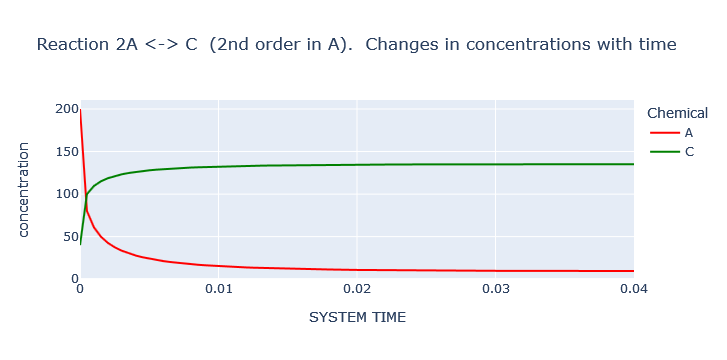

In [21]:
dynamics.plot_curves(colors=['red', 'green'],
                     title="Reaction 2A <-> C  (2nd order in A).  Changes in concentrations with time")

#### For diagnostic insight, uncomment the following lines:

In [19]:
#dynamics.examine_run(df=df, time_step=0.002, rel_fast_threshold=60)
# the time step MUST match the value used in call to single_compartment_react()

#dynamics.diagnose_variable_time_steps()

#dynamics.get_diagnostic_rxn_data(rxn_index=0)

#dynamics.get_diagnostic_conc_data()